In [2]:
############## this is to generate completely synthetic plots for figure 1
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc
import seaborn as sns
import pandas as pd

{'$y=4^k$, total # of UMIs': <matplotlib.lines.Line2D object at 0x7f33071b9540>, '$y=x$': <matplotlib.lines.Line2D object at 0x7f3306b05f00>, 'Expected # of unique UMIs': <matplotlib.lines.Line2D object at 0x7f32dc8cda50>, 'Synthetic UMI data': <matplotlib.collections.PathCollection object at 0x7f32dc8cc610>, '$x=4^k$, total # of UMIs': <matplotlib.lines.Line2D object at 0x7f3306b05d20>, '$x=k4^k$': <matplotlib.lines.Line2D object at 0x7f3306b04bb0>, 'Method-of-Moments estimator': <matplotlib.collections.PathCollection object at 0x7f33068a2e00>}


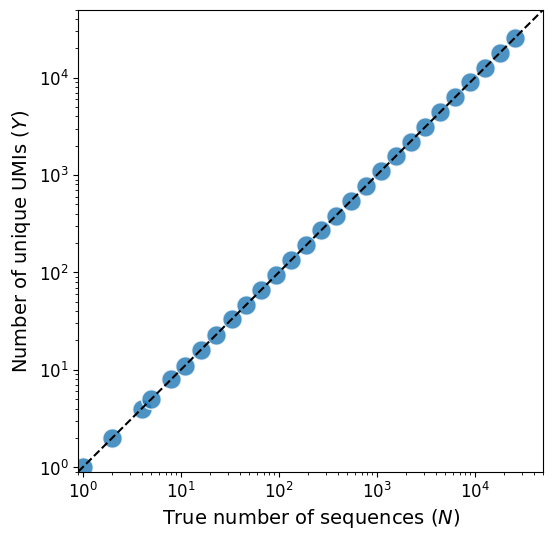

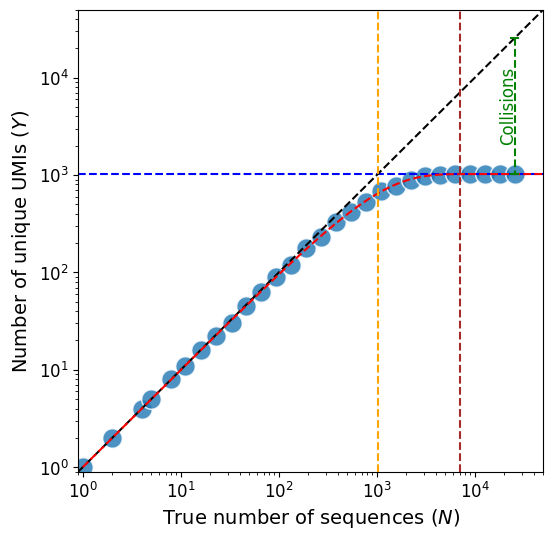

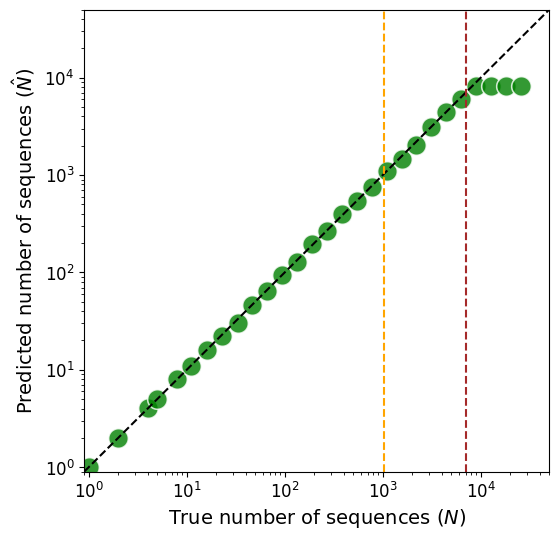

<Figure size 500x80 with 0 Axes>

In [29]:
# Your model function
def f(n_vals, k):
    return 4**k * (1 - (1 - 1 / 4**k)**n_vals)


np.random.seed(42)


def pred(y_vals, k):
    predictions = np.zeros(len(y_vals))
    K = 4**k
    mask = (y_vals == K)
    
    def estimate(y_vals, K):
        return np.log(1 - y_vals/K) / np.log(1 - 1/K)
    
    predictions[~mask] = estimate(y_vals[~mask], K)  # Changed k to K here
    predictions[mask] = estimate(np.array([K-1]), K) + K  # Changed K-1 to array and k to K
    
    return predictions
    


# Fixed UMI length for "true" counts
# i = 12
k = 5  # Fixed comparison UMI length
K=4**k
n_max = 5*10**4
n_values = np.logspace(0, np.log10(n_max), 200)
n_min = .9

# Generate the data
max_n_sim = 5*k*4**k
num_points = 30
n_arr = np.logspace(0, np.log10(max_n_sim), num_points).astype(int)
n_arr = np.unique(n_arr)





########## plot naive for length 12 UMI
k_full = 12
umis = np.random.choice(range(4**k_full), size=int(np.sum(n_arr)), replace=True)
cumulative_counts = np.cumsum(n_arr.astype(int))
y_arr = [len(set(umis[start:end])) for start, end in zip(np.hstack(([0], cumulative_counts[:-1])), cumulative_counts)]
y_arr = np.array(y_arr)

plt.figure(figsize=(6, 6))

# plt.plot([n_min, n_max], [n_min, n_max], color='black', label=r'$y=x$', ls='--')
plt.plot([n_min, n_max], [n_min, n_max], color='black', ls='--')
sns.scatterplot(x=n_arr, y=y_arr, alpha=0.8, s=200)#, zorder=3)  # Increased the size of dots using 's' parameter
# sns.scatterplot(x=n_arr, y=y_arr, alpha=0.8, s=200, label='Synthetic UMI data (k=12)')#, zorder=3)  # Increased the size of dots using 's' parameter
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'True number of sequences ($N$)', fontsize=14)  # Increased font size
plt.ylabel(r'Number of unique UMIs ($Y$)', fontsize=14)  # Increased font size
# plt.legend(fontsize=12)  # Increased font size for legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(n_min, n_max)
plt.ylim(n_min, n_max)
# plt.savefig('figs/synthetic_data_k12.svg', bbox_inches='tight')
plt.savefig('figs/fig1b.pdf', bbox_inches='tight')







############# fig 2
# length k umi
umis = np.random.choice(range(4**k), size=int(np.sum(n_arr)), replace=True)
cumulative_counts = np.cumsum(n_arr.astype(int))
y_arr = [len(set(umis[start:end])) for start, end in zip(np.hstack(([0], cumulative_counts[:-1])), cumulative_counts)]
y_arr = np.array(y_arr)


fig2, ax2 = plt.subplots(figsize=(6,6))

### plot y=x line
# ax2.axhline(y=4**k, color='blue', label=r'$y=4^{0}$, total # of UMIs'.format(k), ls='--')
ax2.axhline(y=4**k, color='blue', label=r'$y=4^k$, total # of UMIs', ls='--')

ax2.plot([n_min, n_max], [n_min, n_max], color='black', label=r'$y=x$', ls='--')

ax2.plot(n_values, f(n_values, k), color='red', label='Expected # of unique UMIs', ls='--')


sns.scatterplot(ax=ax2,x=n_arr, y=y_arr, alpha=0.8, s=200, label=f'Synthetic UMI data', legend=False)#, zorder=3)  # Increased the size of dots using 's' parameter

# sns.scatterplot(ax=ax2,x=n_arr, y=y_arr, alpha=0.8, s=200, label=f'Synthetic UMI data (k={k})')#, zorder=3)  # Increased the size of dots using 's' parameter
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'True number of sequences ($N$)', fontsize=14)
ax2.set_ylabel(r'Number of unique UMIs ($Y$)', fontsize=14)

ax2.axvline(x=4**k, label=r'$x=4^k$, total # of UMIs', ls='--', color='orange')
# ax2.axvline(x=np.sqrt(4**k), label=r'Coupon Collector threshold, $x=\sqrt{K}$', ls='--', color='purple')
ax2.axvline(x=(4**k) * np.log(4**k), label=r'$x=k4^k$', ls='--', color='brown')


#### plot the theoretical curve
# ax2.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside to the top right
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_xlim(n_min, n_max)
ax2.set_ylim(n_min, n_max)


###### add a line for x = max_n_sim between y= max_n_sim and f(max_n_sim, k), with the text "collisions"
ax2.plot([max_n_sim, max_n_sim], [max_n_sim, f(max_n_sim, k)], color='green', ls='--')
ax2.hlines(max_n_sim, max_n_sim - 0.1 * max_n_sim, max_n_sim + 0.1 * max_n_sim, color='green')  # Top horizontal line
ax2.hlines(f(max_n_sim, k), max_n_sim - 0.1 * max_n_sim, max_n_sim + 0.1 * max_n_sim, color='green')  # Bottom horizontal line
# ax2.text(max_n_sim*.90, max_n_sim*1.03, 'Collisions', fontsize=12, color='green', ha='right', va='center')
ax2.text(max_n_sim*.7, np.sqrt(max_n_sim*K), 'Collisions', fontsize=12, color='green', ha='left', va='center', rotation=90)

# plt.savefig('figs/synthetic_data.svg', bbox_inches='tight')
plt.savefig('figs/fig1d.pdf', bbox_inches='tight')


    
    
    
    
########## fig 3    
###### plot estimation
fig3, ax3 = plt.subplots(figsize=(6,6))
optimized_predictions = pred(y_arr, k)
naive_predictions = y_arr
# ax3.plot([n_min, n_max], [n_min, n_max], color='black', label=r'$y=x$', ls='--')
ax3.plot([n_min, n_max], [n_min, n_max], color='black', ls='--')
sns.scatterplot(x=n_arr, y=optimized_predictions, alpha=0.8, s=200, label='Method-of-Moments estimator', color='green', ax=ax3, legend=False)#, zorder=3)  # Increased the size of dots using 's' parameter

#### axvline at K
# ax3.axvline(x=4**k, label=r'$x=K$', ls='--', color='orange')
ax3.axvline(x=4**k, ls='--', color='orange')
##### axvline at K \log K
# ax3.axvline(x=(4**k) * np.log(4**k), label=r'$x=K \log K$', ls='--', color='brown')
ax3.axvline(x=(4**k) * np.log(4**k), ls='--', color='brown')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(n_min, n_max)
ax3.set_ylim(n_min, n_max)

# ax3.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside to the top right
ax3.set_xlabel(r'True number of sequences ($N$)', fontsize=14)  # Increased font size
ax3.set_ylabel(r'Predicted number of sequences ($\hat{N}$)', fontsize=14)  # Increased font size
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
# plt.savefig('figs/synthetic_data_estimation.svg', bbox_inches='tight')
plt.savefig('figs/fig1e.pdf', bbox_inches='tight')





# Collect handles/labels from fig2 and fig3
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()

# Combine
handles_dict = dict(zip(l2 + l3, h2 + h3))
print(handles_dict)
# Define the exact order you want
order = [
    'Synthetic UMI data',
    'Method-of-Moments estimator',
    'Expected # of unique UMIs',
    r'$y=x$',
    r'$y=4^k$, total # of UMIs',
    r'$x=4^k$, total # of UMIs',
    r'$x=k4^k$'
]

# Reorder
handles = [handles_dict[label] for label in order if label in handles_dict]
labels  = [label for label in order if label in handles_dict]


from collections import OrderedDict
# handles2, labels2 = ax2.get_legend_handles_labels()
# handles3, labels3 = ax3.get_legend_handles_labels()

# # Deduplicate while preserving order
# pairs = list(OrderedDict(
#     (lab, h) for h, lab in zip(handles2 + handles3, labels2 + labels3)
# ).items())
# labels, handles = zip(*pairs)  # (label, handle) -> unzip

# Create a tiny, legend-only figure
fig_leg = plt.figure(figsize=(5, 0.8))  # tweak width/height & ncol to taste
fig_leg.legend(handles, labels, loc='center', frameon=False, ncol=3)
fig_leg.savefig('figs/common_legend_plots2_3.pdf', bbox_inches='tight')
# plt.close(fig_leg)